In [10]:
# We begin stochastic modelling with a model that is extremely simple,
# yet still has rich dynamics. The model is motivated by the evolution of
# species. Consider N different species. We place these on a ring and decide
# that they only interact with their neighbours. So species i interacts with
# species i − 1 and i + 1. With periodicity, species 0 interacts with species
# 1 and N − 1.
# Each species has a fitness f_i which is a number between 0 and 1: 0
# meaning a really terrible species and 1 meaning highest fitness.

# (a) Initialise N = 1000 species each with a random fitness f_i ∈ [0, 1].

import random
import numpy as np
import matplotlib.pyplot as plt
N = 1000
species_fitness = np.zeros(N)

for i in range(N):
    species_fitness[i] = random.uniform(0,1)



In [11]:
# Each time step of the model is a very simple rule: find the species with
# the lowest fitness and mutate it and its immediate neighbours to a new
# random fitness [0, 1] (the neighbours are also mutated since fitness is a
# context-dependent measure. The fitness of one species depends on the
# species it interacts with).

# Run the simulation for 100,000 time steps.

# b
steps = 100000
minimum_fitnesses = np.zeros(steps)
step_list = np.zeros(steps)
for i in range(steps):
    min_fitness = min(species_fitness)
    minimum_fitnesses[i] = min_fitness
    step_list[i] = i
    for j, fit in enumerate(species_fitness):
        if min_fitness == species_fitness[j]:
            # case for last elem
            if j == N-1:
                species_fitness[j] = random.uniform(0,1)
                species_fitness[j-1] = random.uniform(0,1)
                species_fitness[0] = random.uniform(0,1)
            # case for first elem
            elif j == 0:
                species_fitness[j] = random.uniform(0,1)
                species_fitness[j+1] = random.uniform(0,1)
                species_fitness[N-1] = random.uniform(0,1)
            # default
            else:
                species_fitness[j] = random.uniform(0,1)
                species_fitness[j-1] = random.uniform(0,1)
                species_fitness[j+1] = random.uniform(0,1)




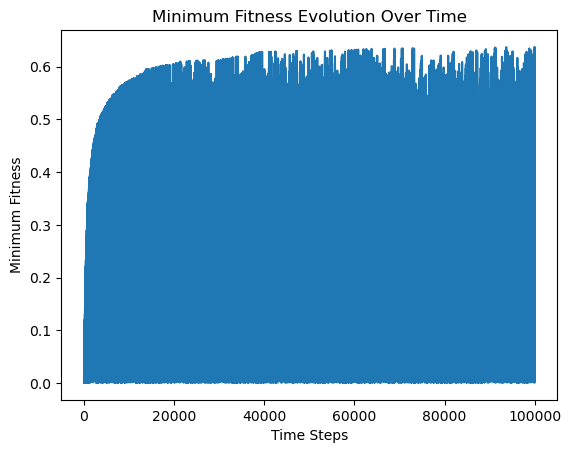

In [12]:
# Plot the minimum fitness as a function of time.

# c
plt.plot(step_list, minimum_fitnesses)
plt.xlabel('Time Steps')
plt.ylabel('Minimum Fitness')
plt.title('Minimum Fitness Evolution Over Time')
plt.show()

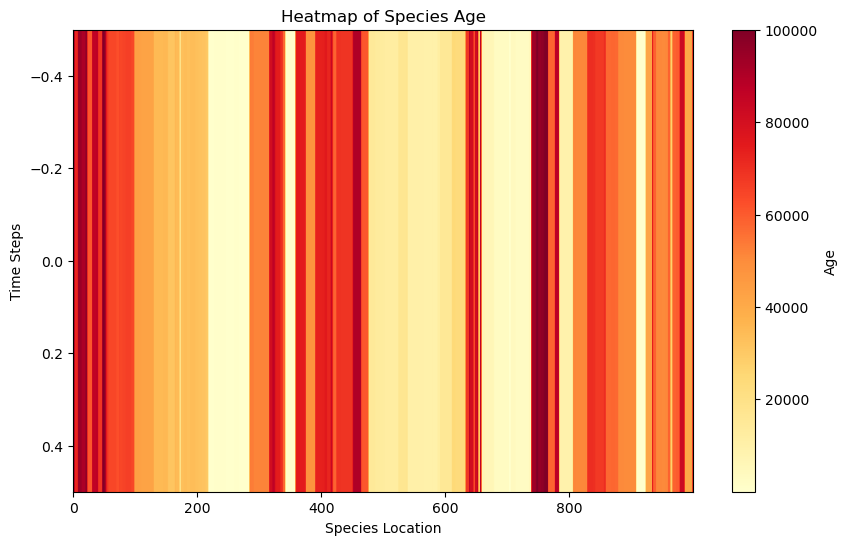

In [15]:
# Plot a heatmap (location i along the x-axis and time along the
# y-axis) of the “age” of each species. In other words, plot a heatmap where
# at a given location you plot the time since a species was last replaced at
# that location. You should hopefully find that as time goes on, species tend
# to stay around longer and longer.
# Hint: only plot every 100th time step along the y-axis to speed up your
# code.

# d

import random
import numpy as np
import matplotlib.pyplot as plt

N = 1000
species_fitness = np.zeros(N)

for i in range(N):
    species_fitness[i] = random.uniform(0, 1)

steps = 100000
minimum_fitnesses = np.zeros(steps)
step_list = np.zeros(steps)
age_array = np.zeros(N)

for i in range(steps):
    min_fitness = min(species_fitness)
    minimum_fitnesses[i] = min_fitness
    step_list[i] = i
    for j, fit in enumerate(species_fitness):
        if min_fitness == species_fitness[j]:
            age_array[j] = 0
            age_array = age_array + 1
            if j == N-1:
                species_fitness[j] = random.uniform(0,1)
                species_fitness[j-1] = random.uniform(0,1)
                species_fitness[0] = random.uniform(0,1)
            # case for first elem
            elif j == 0:
                species_fitness[j] = random.uniform(0,1)
                species_fitness[j+1] = random.uniform(0,1)
                species_fitness[N-1] = random.uniform(0,1)
            # default
            else:
                species_fitness[j] = random.uniform(0,1)
                species_fitness[j-1] = random.uniform(0,1)
                species_fitness[j+1] = random.uniform(0,1)

# Create heatmap
plt.figure(figsize=(10, 6))
plt.imshow([age_array], cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Age')
plt.xlabel('Species Location')
plt.ylabel('Time Steps')
plt.title('Heatmap of Species Age')
plt.show()


In [ ]:
# Based on the above plot, make a comment about mass extinctions.

# e